# Machine Intelligence II (week 3) - Team MensaNord

- Nikolai Zaki
- Alexander Moore
- Johannes Rieke
- Georg Hoelger
- Oliver Atanaszov

In [228]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1

### A

In [182]:
data1 = pd.read_csv('pca2.csv', sep=',')
data1.shape
data1.ix[0:2, 'X1':'X2']
data1.ix[0:2, :]

,X1,X2
0,-0.460516,-0.599575
1,1.004258,1.213128
2,2.224446,-0.584735


In [158]:
m = np.mean(data1, 0)
data1_centered = data1 - m
data1_centered.ix[0:2, :]

,X1,X2
0,-1.411663,-1.612040
1,0.053112,0.200662
2,1.273300,-1.597200


In [159]:
covariance1 = np.cov(data1_centered.T)
evals1, evecs1 = np.linalg.eig(covariance1)
transmat1 = evecs1.T
evec1 = transmat1[0]
evec2 = transmat1[1]

data1_trans = np.array([[0.0, 0.0] for i in range(len(data1))])
for i in range(len(data1)):
    data1_trans[i] = np.dot(transmat1, data1_centered.ix[i, :])
data1_trans[0:3, :]

array([[-1.99528617, -0.78121602],
       [ 0.1395242 ,  0.15368564],
       [ 0.39509079, -2.00405686]])

/home/georg/anaconda3/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


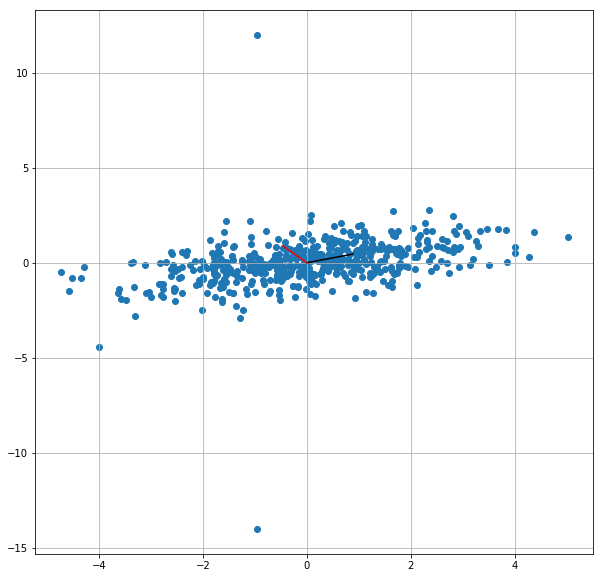

In [174]:
# plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(data1_centered.ix[:, 'X1'], data1_centered.ix[:, 'X2'])
ax.set_color_cycle(['black', 'red'])
plt.plot([0, evec1[0]], [0, evec1[1]])
plt.plot([0, evec2[0]], [0, evec2[1]])
plt.grid()
plt.show()

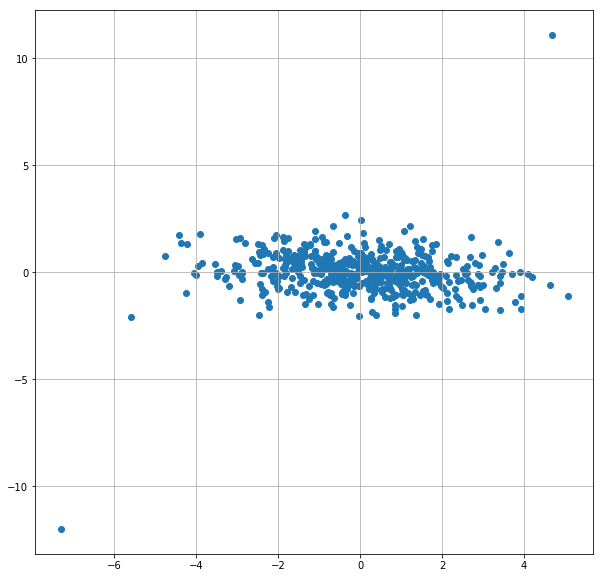

In [175]:
plt.figure(figsize=(10, 10))
plt.scatter(data1_trans.T[0], data1_trans.T[1])
plt.grid()
plt.show()

### B

In [176]:
data1b_c = np.copy(data1_centered)
data1b_c[16, :] = 0
data1b_c[156, :] = 0

cov1b = np.cov(data1b_c.T)
evals1b, evecs1b = np.linalg.eig(cov1b)
transmat1b = evecs1b.T
evec1b = transmat1b[0]
evec2b = transmat1b[1]

data1b_t = np.array([[0.0, 0.0] for i in range(len(data1))])
for i in range(len(data1)):
    data1b_t[i] = np.dot(transmat1b, data1b_c[i, :])

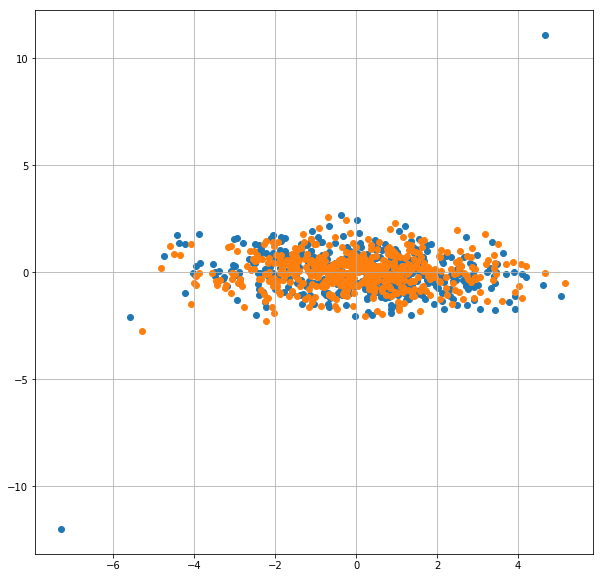

In [177]:
plt.figure(figsize=(10, 10))
plt.scatter(data1_trans.T[0], data1_trans.T[1])
plt.scatter(data1b_t.T[0], data1b_t.T[1])
plt.grid()
plt.show()

TODO What is the difference?

## Exercise 2

### A

In [124]:
data = np.loadtxt('pca4.csv', skiprows=1, delimiter=',')
data.shape, data[:10]

((500, 4), array([[ 2.22596182,  0.10936602, -0.05005915,  0.51865154],
        [-1.07500369, -4.83287743, -0.41939855,  0.8437185 ],
        [ 0.33169257,  1.49399059, -0.09823864,  0.36632831],
        [ 0.46171386, -1.4026671 , -0.01851781,  0.31078302],
        [ 2.87407837,  3.89276164,  0.23303518, -0.09922712],
        [ 0.2306071 ,  2.37251845, -0.51103373, -0.25344405],
        [ 0.73994802, -2.16476182,  0.37020777, -0.35440685],
        [-0.99456035, -3.84759242,  0.37249191,  0.34450451],
        [ 2.51336538,  1.39672866, -0.17322848, -0.15757368],
        [-2.18370375, -0.08684707, -0.44014269, -0.26767374]]))

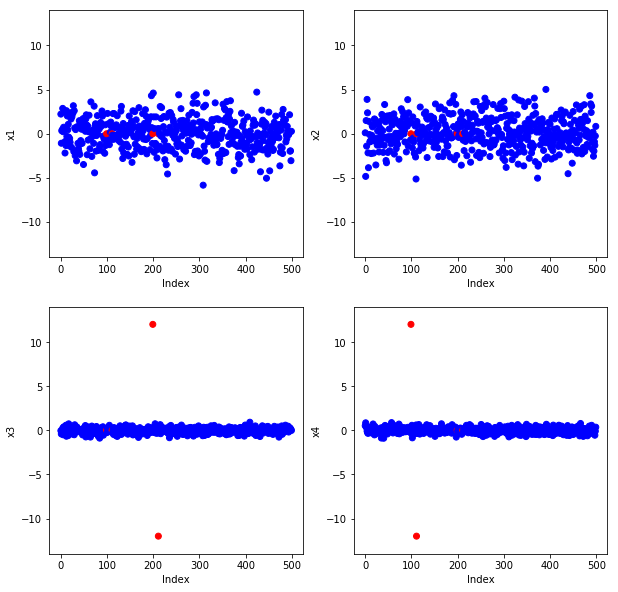

In [184]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

outliers = [99, 199, 111, 211]

for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.scatter(range(len(data)), data[:, i], c=['r' if a in outliers else 'b' for a in range(len(data))])
    plt.ylabel('x{}'.format(i+1))
    plt.xlabel('Index')
    plt.ylim(-14, 14)

The data points at indices 99, 111, 199 and 211 (marked in red in the plot above) are apparently outliers and will be discarded.

In [175]:
filtered_data = np.delete(data, outliers, axis=0)
filtered_data.shape

(496, 4)

### B

In [176]:
centered_data = filtered_data - filtered_data.mean(axis=0)
centered_data[:10]

array([[  2.22010272e+00,   5.74689244e-04,  -2.95351627e-02,
          5.31504668e-01],
       [ -1.08086279e+00,  -4.94166876e+00,  -3.98874563e-01,
          8.56571630e-01],
       [  3.25833467e-01,   1.38519925e+00,  -7.77146575e-02,
          3.79181437e-01],
       [  4.55854757e-01,  -1.51145843e+00,   2.00617505e-03,
          3.23636152e-01],
       [  2.86821927e+00,   3.78397031e+00,   2.53559167e-01,
         -8.63739942e-02],
       [  2.24747995e-01,   2.26372711e+00,  -4.90509747e-01,
         -2.40590922e-01],
       [  7.34088911e-01,  -2.27355315e+00,   3.90731752e-01,
         -3.41553719e-01],
       [ -1.00041946e+00,  -3.95638375e+00,   3.93015898e-01,
          3.57357644e-01],
       [  2.50750627e+00,   1.28793732e+00,  -1.52704498e-01,
         -1.44720548e-01],
       [ -2.18956286e+00,  -1.95638404e-01,  -4.19618702e-01,
         -2.54820606e-01]])

In [177]:
cov = np.cov(centered_data.T)
cov.shape

(4, 4)

In [178]:
evals, evecs = np.linalg.eig(cov)

(0, 4.3703559865800043)

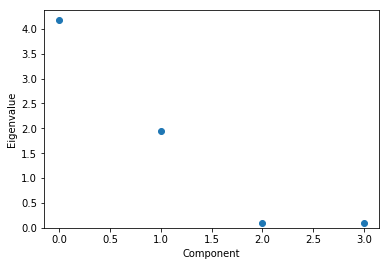

In [179]:
plt.plot(evals, 'o')
plt.ylabel('Eigenvalue')
plt.xlabel('Component')
plt.ylim(0)

In [180]:
evals

array([ 4.16661605,  1.93983139,  0.10130627,  0.09181741])

The first two PCs seem sufficient to represent the data. The third and fourth PCs are negligible. 

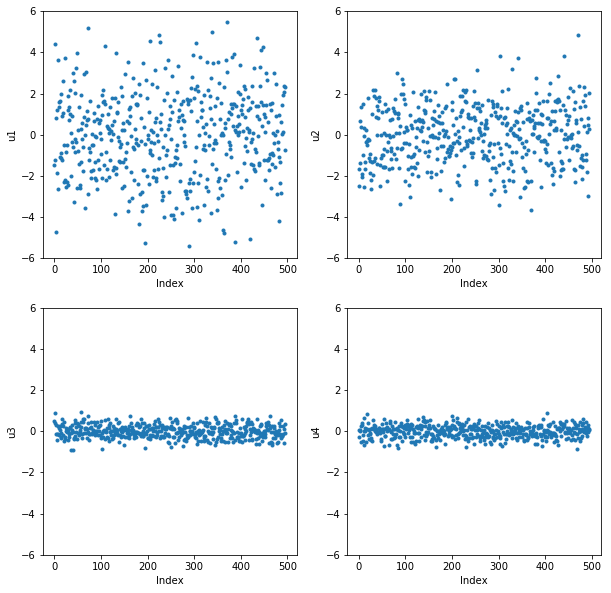

In [246]:
projected_data = np.dot(evecs.T, centered_data.T).T

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.plot(projected_data[:, i], '.')
    plt.ylabel('u{}'.format(i+1))
    plt.xlabel('Index')
    plt.ylim(-6, 6)

### C

In [248]:
whitened_data = evecs.T.dot(centered_data.T).T.dot(np.diag(1 / np.sqrt(evals)))

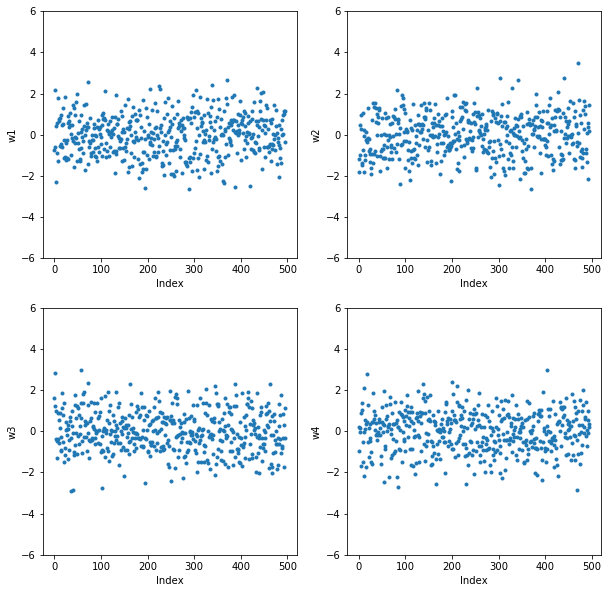

In [252]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.plot(whitened_data[:, i], '.')
    plt.ylabel('w{}'.format(i+1))
    plt.xlabel('Index')
    plt.ylim(-6, 6)

### D

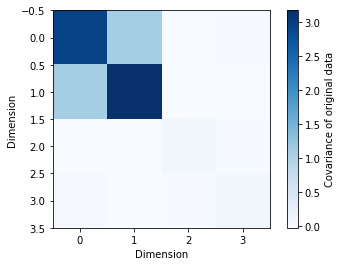

In [273]:
plt.imshow(cov, cmap='Blues')
plt.colorbar(label='Covariance of original data')
plt.xlabel('Dimension')
plt.ylabel('Dimension')

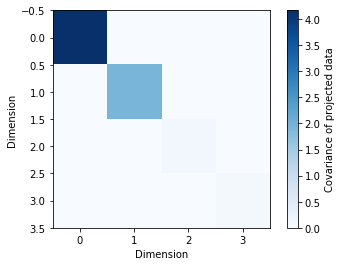

In [272]:
projected_cov = np.cov(projected_data.T)
plt.imshow(projected_cov, cmap='Blues')
plt.colorbar(label='Covariance of projected data')
plt.xlabel('Dimension')
plt.ylabel('Dimension')

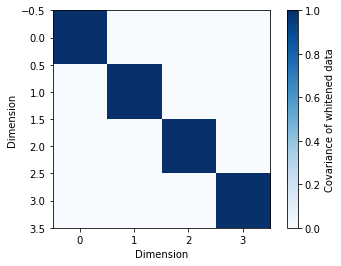

In [271]:
whitened_cov = np.cov(whitened_data.T)
plt.imshow(whitened_cov, cmap='Blues')
plt.colorbar(label='Covariance of whitened data')
plt.xlabel('Dimension')
plt.ylabel('Dimension')